## Building Machine Learning Model to predict whether the cancer is benign or malignant on Breast Cancer Wisconsin Data Set !! Part 1

We will follow the below Macine Learning pipeline steps:
    1. Step 1: Define Problem Statement
    2. Step 2: Data Collection
    3. Step 3: Cleaning the Data
    4. Step 4: Data Analysis and Exploration
    5. Step 5: Feature Selection
    6. Step 6: Data Modelling
    7. Step 7: Mode Validation
    8. Step 8: Deployment
    
#### This is the notebook for step 1 to step 4
===========================================================================================================

### Step 1: Define Problem Statement

Our objective is to identify which features are most helpful in predicting malignant or benign cancer and to classify whether the breast cancer is benign or malignant.

### Step 2: Data Collection

##### DATA OVERVIEW

I have used publically available dataset Breast Cancer Wisconsin and have download from UCI Machine Learning Repository.
Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
Attribute Information:
#### 1. ID number
#### 2. Diagnosis (M = malignant, B = benign) 
#### 3-32 Ten real-valued features are computed for each cell nucleus:
#### a. radius (mean of distances from center to points on the perimeter)
#### b. texture (standard deviation of gray-scale values)
#### c. perimeter 
#### d) area 
#### e) smoothness (local variation in radius lengths)
#### f. compactness (perimeter^2 / area - 1.0)
#### g. concavity (severity of concave portions of the contour)
#### h. concave points (number of concave portions of the contour)
#### i. symmetry j) fractal dimension ("coastline approximation" - 1)
The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

### Step 3: Cleaning the Data

Before fitting a machine learning model or statistical model, we always have to clean the data. No models create meaningful results with messy data.

Data Analyst/scientists spend a large amount of their time cleaning datasets and getting them down to a form with which they can work. In fact, a lot of data scientists argue that the initial steps of obtaining and cleaning data constitute 80% of the job.

"Data quality is one of the most important problems in data management, since dirty data often leads to inaccurate data analytics results and incorrect business decisions by Ihab F. Ilyas (Author), Xu Chu (Author)."

Data cleaning is the process to identifying and correcting (or removing) errors in the dataset that may negatively impact on a machine learning model's performance.

There are many types of errors that exist in a dataset, although some of the simplest errors include columns that don’t contain much information and duplicated rows. 

Here, I’ll cover the following:
1. Check missing or Null data points
2. Dropping unnecessary columns in a dataset
3. Identify rows that contain duplicate records

In [1]:
# importing the libraries
import numpy as np 
# data processing, CSV file I/O
import pandas as pd 
# data visualization library
import seaborn as sns  
import matplotlib.pyplot as plt
import time
#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

#### Import  dataset

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Muhd-Shahid/Breast-Cancer-Wisconsin/master/data_breast-cancer-wiscons.csv')

#### Check our data … Quickly

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Get the dimensions of the data

In [4]:
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (569, 33)


#### Check missing or Null data points

In [5]:
#dataset.isnull().sum()
#dataset.isna().sum()
## Get column data types and missing values in Columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

#### Also check if the column is unique

In [7]:
# Get column names
column_names = dataset.columns 
for i in column_names:
  print('{} is unique: {}'.format(i, dataset[i].is_unique))

id is unique: True
diagnosis is unique: False
radius_mean is unique: False
texture_mean is unique: False
perimeter_mean is unique: False
area_mean is unique: False
smoothness_mean is unique: False
compactness_mean is unique: False
concavity_mean is unique: False
concave points_mean is unique: False
symmetry_mean is unique: False
fractal_dimension_mean is unique: False
radius_se is unique: False
texture_se is unique: False
perimeter_se is unique: False
area_se is unique: False
smoothness_se is unique: False
compactness_se is unique: False
concavity_se is unique: False
concave points_se is unique: False
symmetry_se is unique: False
fractal_dimension_se is unique: False
radius_worst is unique: False
texture_worst is unique: False
perimeter_worst is unique: False
area_worst is unique: False
smoothness_worst is unique: False
compactness_worst is unique: False
concavity_worst is unique: False
concave points_worst is unique: False
symmetry_worst is unique: False
fractal_dimension_worst is uni

Now let’s see if the dataframe has an index associated with it, by calling .index on the df. If there is no index, you’ll get an AttributeError: ‘function’ object has no attribute ‘index’ error displayed.

#### Check the index values

In [8]:
dataset.index.values
# Check if a certain index exists
#'foo' in dataset.index.values
# If index does not exist
#df.set_index('column_name_to_use', inplace=True)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

#### Drop unnecessary columns in a dataset

In [6]:
# Get column names
col = dataset.columns       # .columns gives columns names in data 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


There are 4 things that take my attention 
1. There is an id that cannot be used for classificaiton 
2. Diagnosis is our class label 
3. Unnamed: 32 feature includes NaN so we do not need it. 
4. I do not have any idea about other feature names actually I do not need because machine learning is awesome :)

Therefore, drop these unnecessary features. However do not forget this is not a feature selection.

In [14]:
# y includes our labels and x includes our features
y = dataset.diagnosis                          # M or B 
list = ['Unnamed: 32','id','diagnosis']
x = dataset.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Identify rows that contain duplicate Data

In [ ]:
# calculate duplicates
dups = x.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(x[dups])

Each row of the data represents an observation for one patient and the columns hold the variables. There are total 569 patients with 33 columns.There are 31 numerical columns, 1 ID column and 1 categorical class column. There are no missing and duplicate values in the dataset.

### Step 4: Data Analysis and Exploration

#### It is the process of figuring out what the data can tell us and we use EDA to find patterns, relationships, or anomalies to inform our subsequent analysis.

We will look for patterns, differences, and other features that address the questions
we are interested in also will try to uncovered the relationships between the different variables.

Number of Benign:  357
Number of Malignant :  212


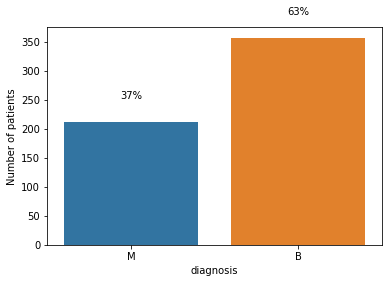

In [11]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)
ax.set_ylabel('Number of patients')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

#### Basic statistics

In [12]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Okey, now we have features but what does they mean or actually how much do we need to know about these features The answer is that we do not need to know meaning of these features however in order to imagine in our mind we should know something like variance, standart deviation, number of sample (count) or max min values. These type of information helps to understand about what is going on data. For example , the question is appeared in my mind the area_mean feature's max value is 2500 and smoothness_mean features' max 0.16340. Therefore do we need standirdization or normalization before visualization, feature selection, feature extraction or classificaiton? The answer is yes and no not surprising ha :) Anyway lets go step by step and start with visualization.

### Visual data exploitation

In order to visualize data we are going to use seaborn plots that is not used in other kernels to inform you and for diversity of plots. What I use in real life is mostly violin plot and swarm plot. Do not forget we are not selecting feature, we are trying to know the data.

Before violin and swarm plot we need to normalization or standirdization. Because differences between values of features are very high to observe on plot. I plot features in 3 group and each group includes 10 features to observe better.

#### Exploring data using violinplot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

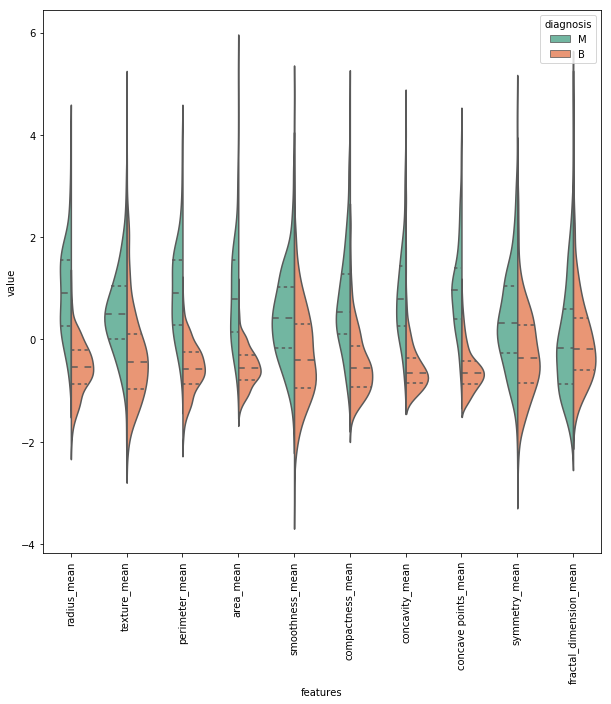

In [17]:
# first ten features
data_dia = y
data = x
# standardization of the data
data_n_2 = (data - data.mean()) / (data.std())

data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart",palette ="Set2")
plt.xticks(rotation=90)

Lets interpret the plot above together. For example, in texture_mean feature, median of the Malignant and Benign looks like separated so it can be good for classification. However, in fractal_dimension_mean feature, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

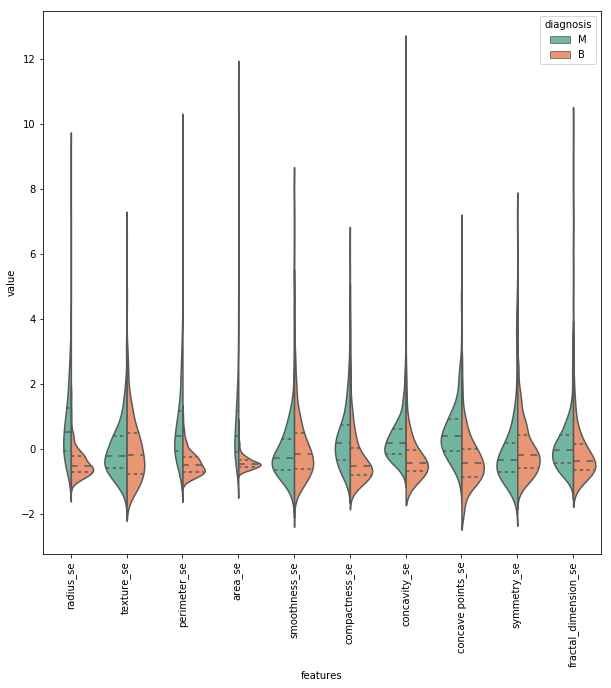

In [22]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart",palette ="Set2")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

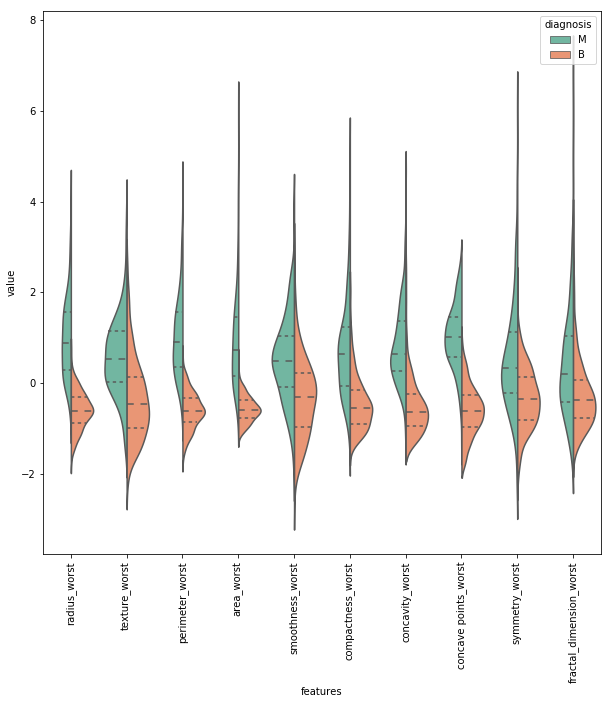

In [23]:
# Last ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart",palette ="Set2")
plt.xticks(rotation=90)

#### Exploring data using boxplot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

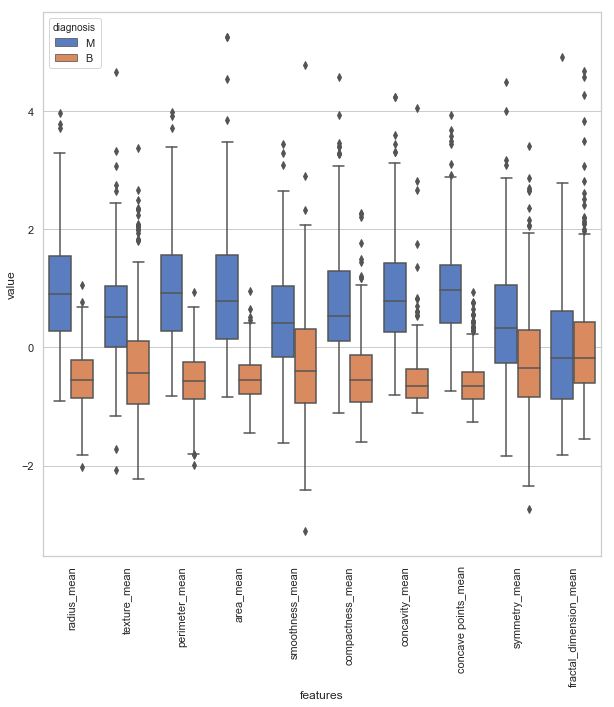

In [66]:
# As an alternative of violin plot, box plot can be used.Box plots are also useful in terms of seeing outliers
# In order to show you lets have an example of box plot
# first ten features
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data,palette ="muted")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

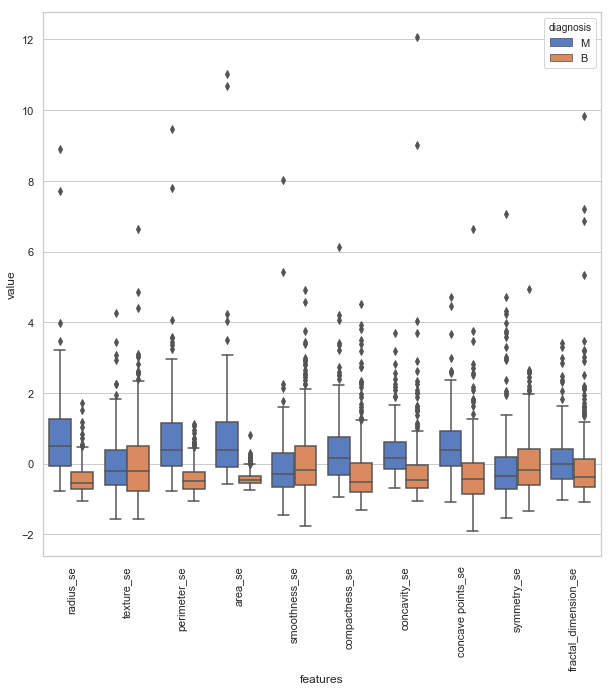

In [67]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data,palette ="muted")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

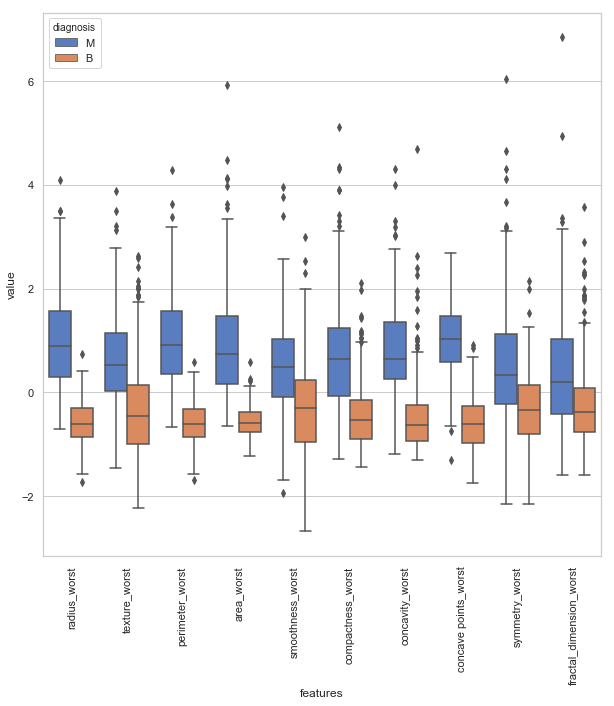

In [68]:
# Last ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data,palette ="muted")
plt.xticks(rotation=90)

Lets interpret one more thing about plot above, variable of concavity_worst and concave point_worst looks like similar but how can we decide whether they are correlated with each other or not. (Not always true but, basically if the features are correlated with each other we can drop one of them)

In order to compare two features deeper, lets use joint plot. Look at this in joint plot below, it is really correlated. Pearsonr value is correlation value and 1 is the highest. Therefore, 0.86 is looks enough to say that they are correlated. Do not forget, we are not choosing features yet, we are just looking to have an idea about them.

In [18]:
x.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#### Exploring data using jointplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


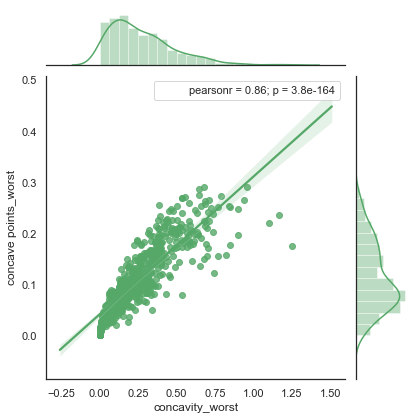

In [70]:
import scipy.stats as stats
sns.set(style="white",color_codes=True)
jp=sns.jointplot(x.loc[:,'concavity_worst'], x.loc[:,'concave points_worst'], kind="regg",color="g")
#jp=sns.jointplot(x.loc[:,'smoothness_se'], x.loc[:,'texture_se'], kind="regg",color="b")
jp.annotate(stats.pearsonr)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


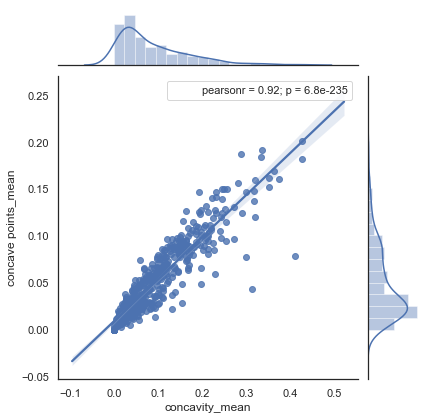

In [53]:
jp=sns.jointplot(x.loc[:,'concavity_mean'], x.loc[:,'concave points_mean'], kind="regg",color="b")
jp.annotate(stats.pearsonr)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


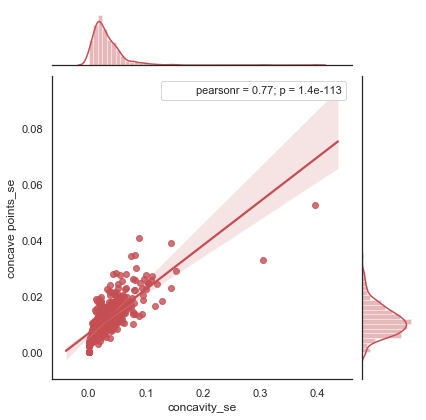

In [54]:
jp=sns.jointplot(x.loc[:,'concavity_se'], x.loc[:,'concave points_se'], kind="regg",color="r")
jp.annotate(stats.pearsonr)

What about three or more feauture comparision ? For this purpose we can use pair grid plot. Also it seems very cool :) And we discover one more thing radius_worst, perimeter_worst and area_worst are correlated as it can be seen pair grid plot. We definetely use these discoveries for feature selection.

#### Exploring data using pairplot : To cehck both the distribution of single variable and relationship between two variables.

<Figure size 720x720 with 0 Axes>

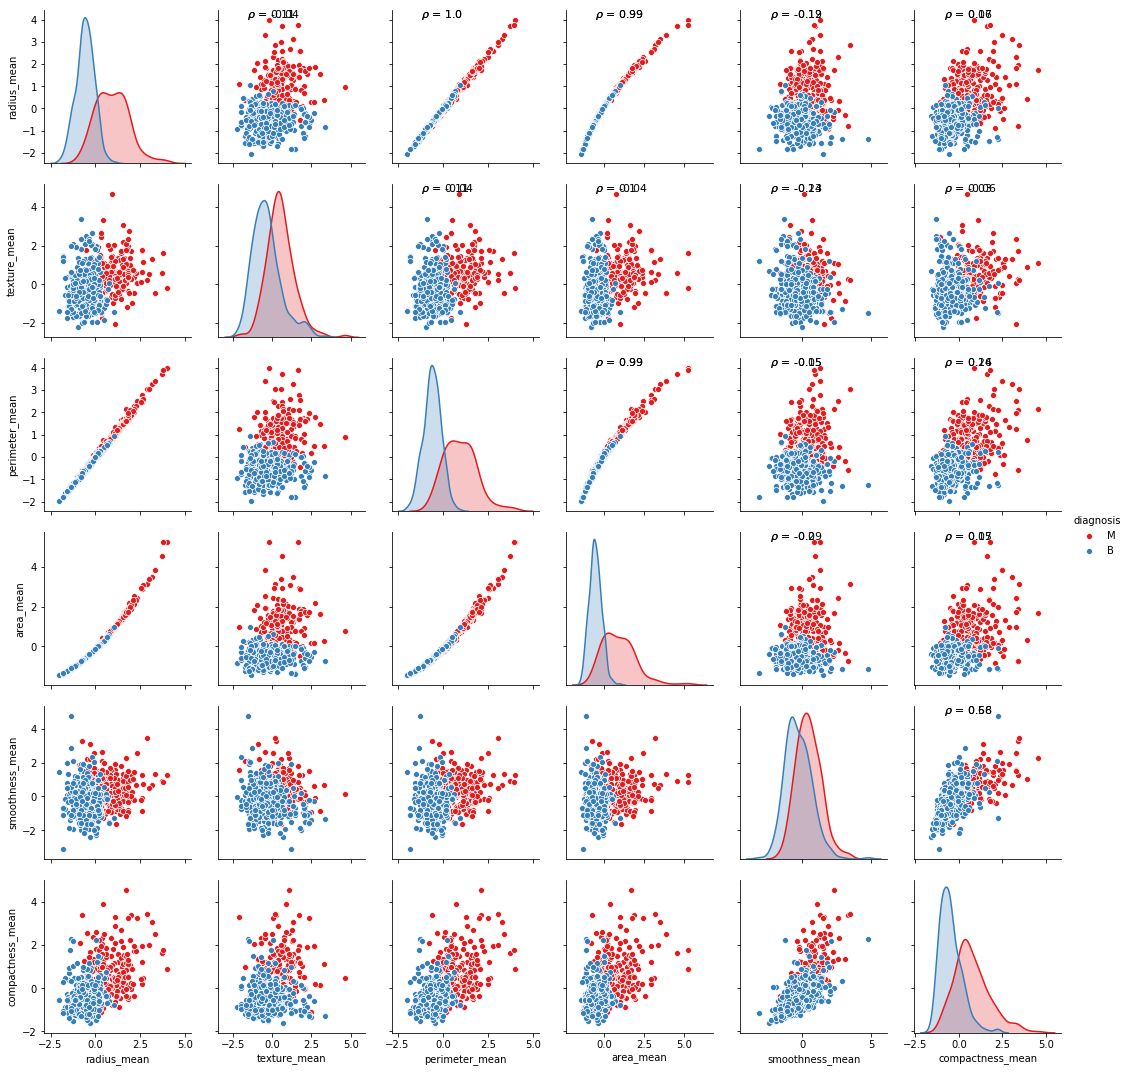

In [35]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 11, xycoords = ax.transAxes)
# First six features
data = pd.concat([y,data_n_2.iloc[:,0:6]],axis=1)
plt.figure(figsize=(10,10))
grid=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Set1")
# Map the plots to the locations
#grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
#grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
#grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');

<Figure size 720x720 with 0 Axes>

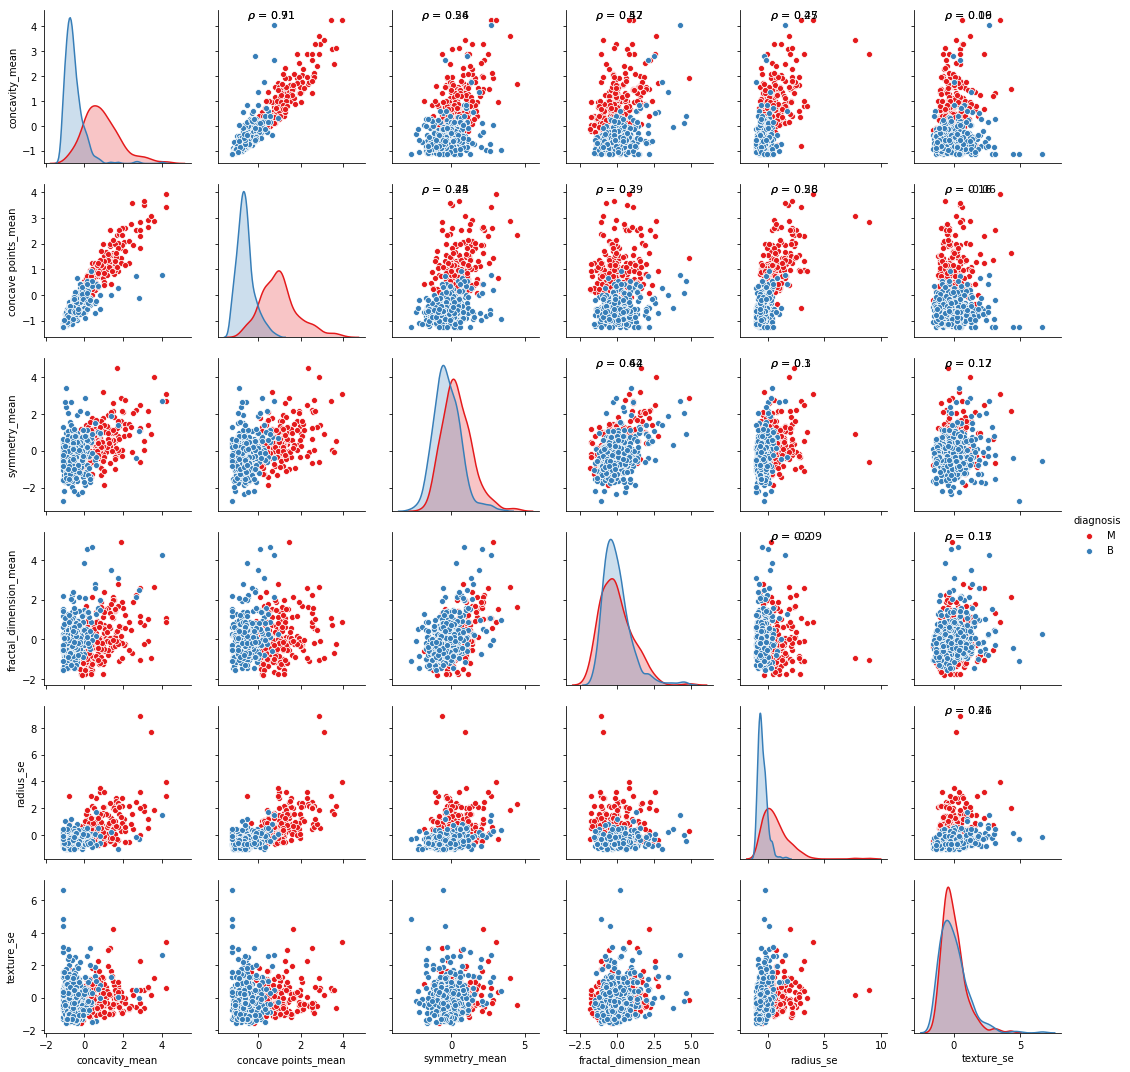

In [36]:
# First six features
data = pd.concat([y,data_n_2.iloc[:,6:12]],axis=1)
plt.figure(figsize=(10,10))
grid=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Set1")
# Map the plots to the locations
#grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
#grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
#grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');

<Figure size 720x720 with 0 Axes>

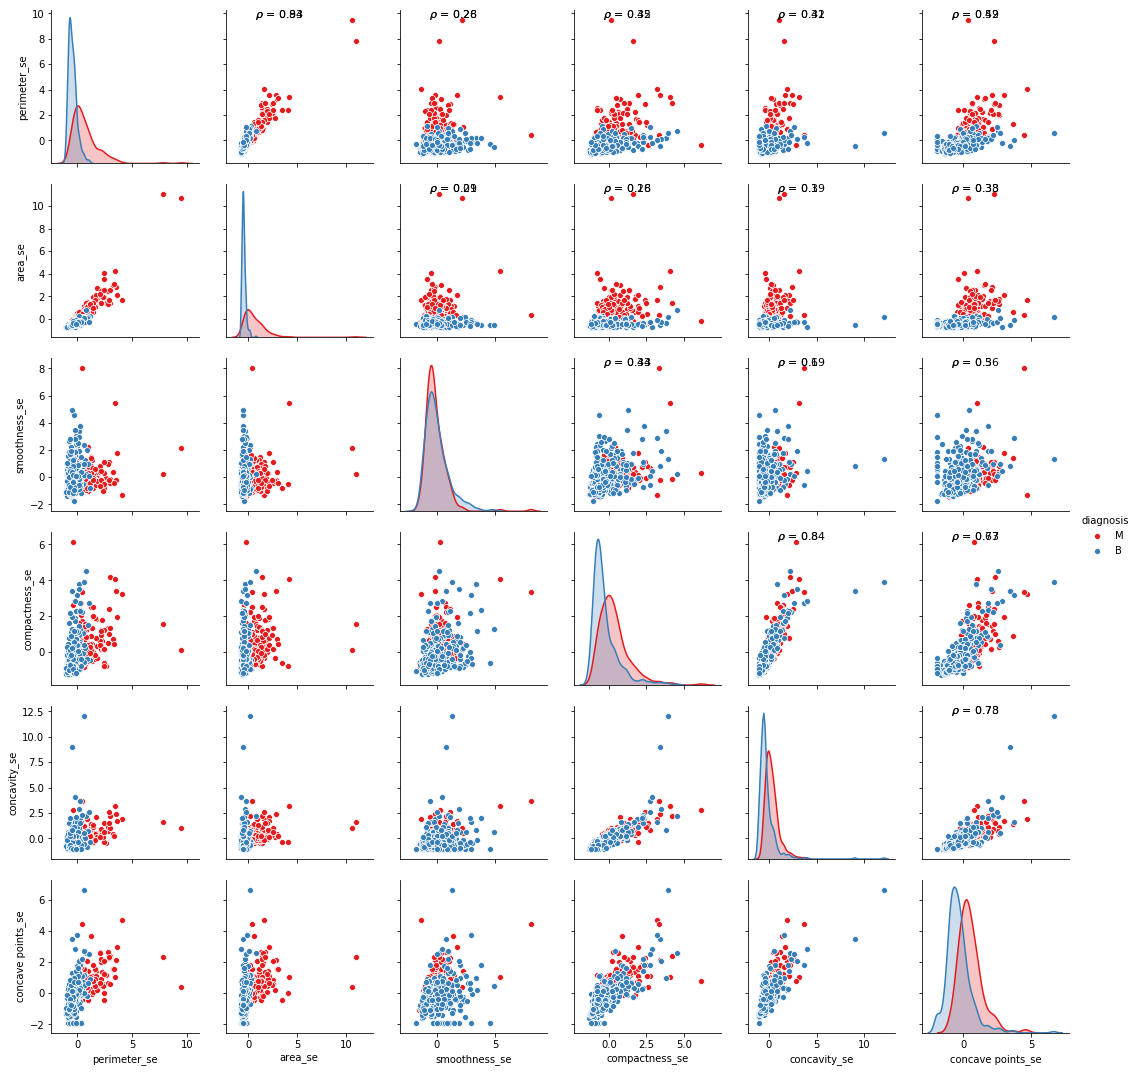

In [37]:
# First six features
data = pd.concat([y,data_n_2.iloc[:,12:18]],axis=1)
plt.figure(figsize=(10,10))
grid=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Set1")
# Map the plots to the locations
#grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
#grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
#grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');

<Figure size 720x720 with 0 Axes>

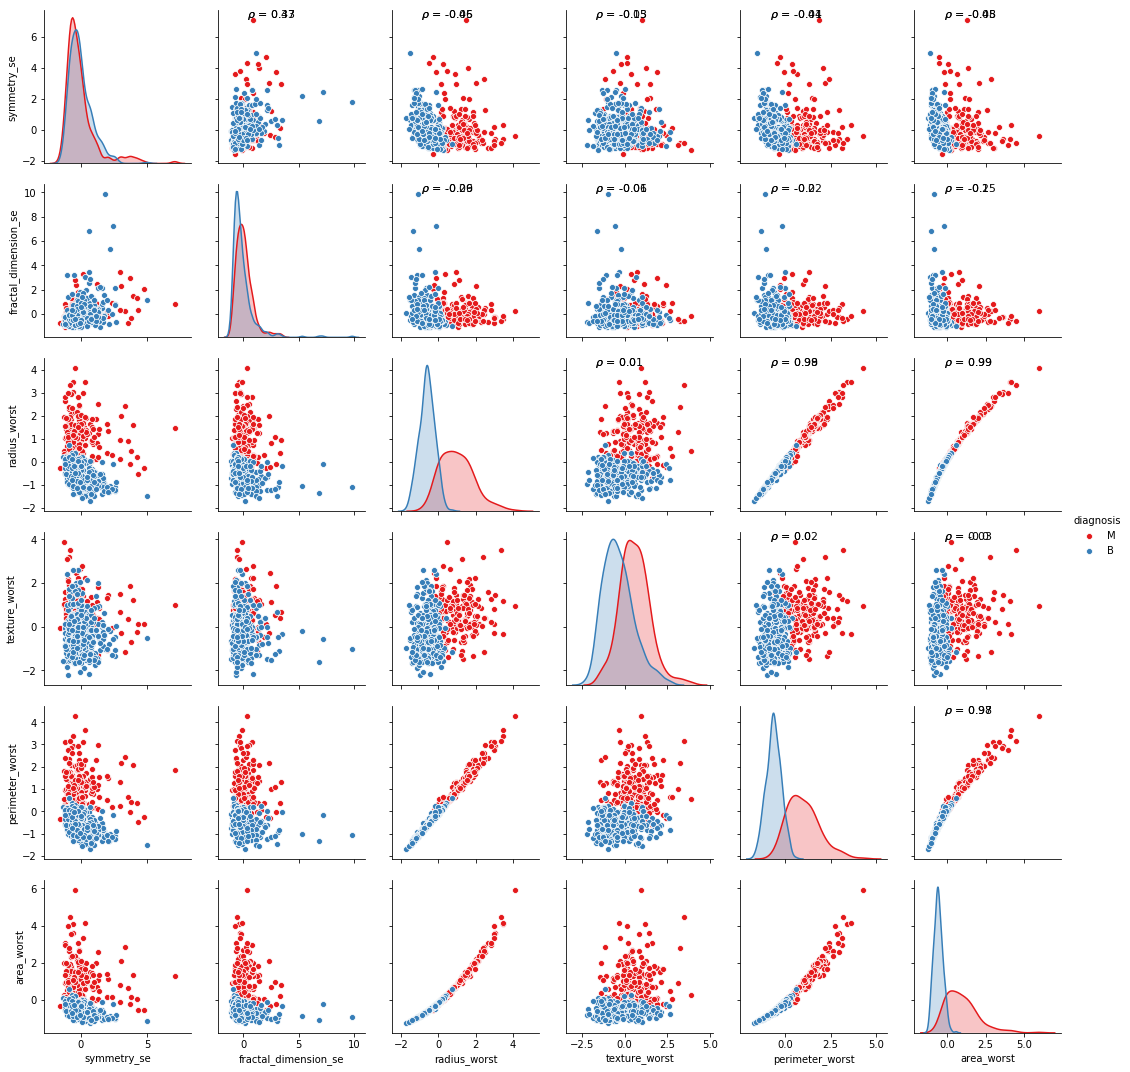

In [38]:
# First six features
data = pd.concat([y,data_n_2.iloc[:,18:24]],axis=1)
plt.figure(figsize=(10,10))
grid=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Set1")
# Map the plots to the locations
#grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
#grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
#grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');

<Figure size 720x720 with 0 Axes>

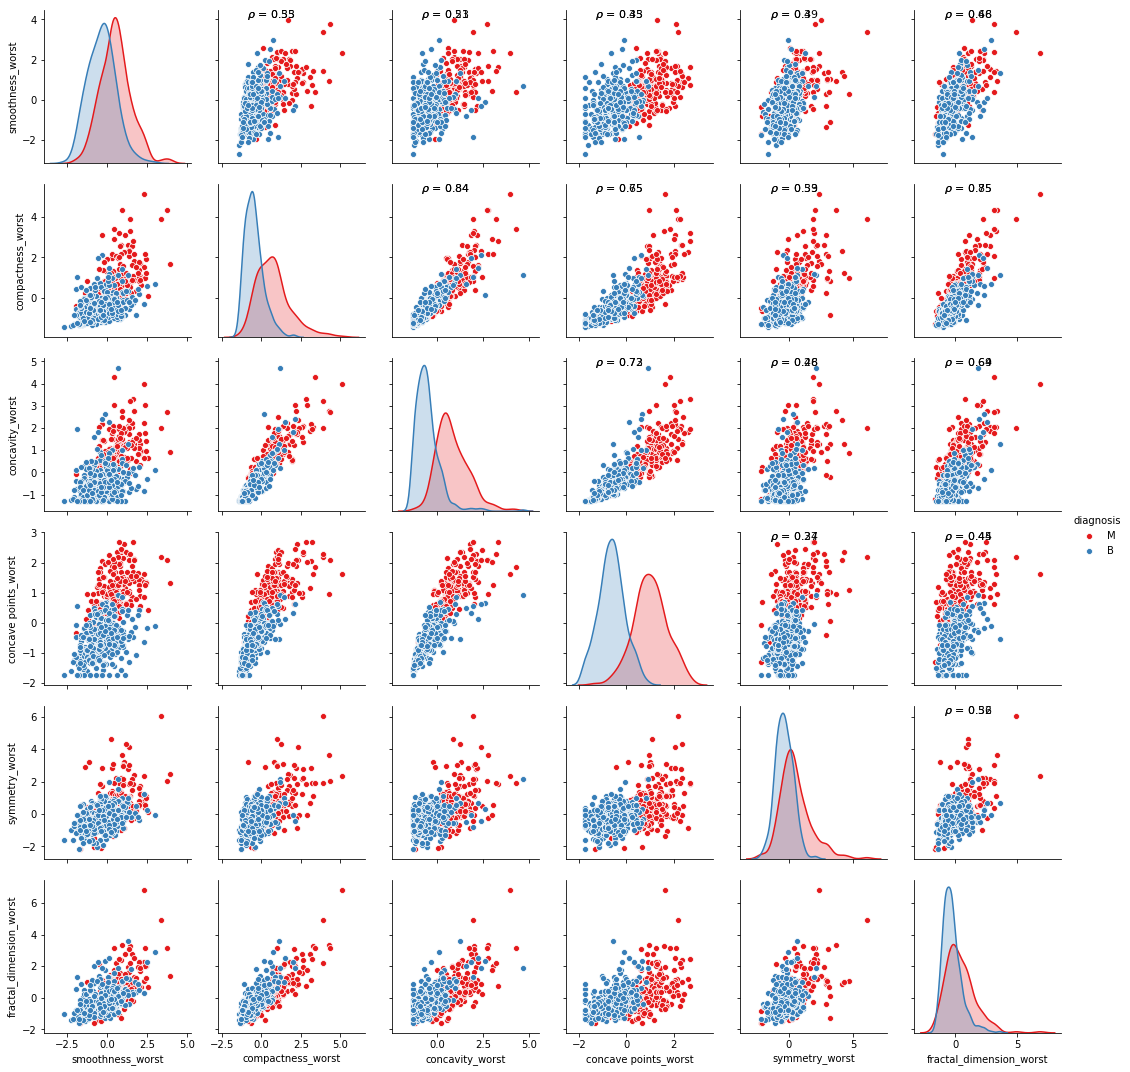

In [39]:
# First six features
data = pd.concat([y,data_n_2.iloc[:,24:32]],axis=1)
plt.figure(figsize=(10,10))
grid=sns.pairplot(data=data,kind ="scatter",hue="diagnosis",palette="Set1")
# Map the plots to the locations
#grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
#grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
#grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');

Up to this point, we make some comments and discoveries on data already. If you like what we did, I am sure swarm plot will help you to understand the data better.

In swarm plot, I will do three part like violin plot not to make plot very complex appearance

#### Exploring data using swarmplot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

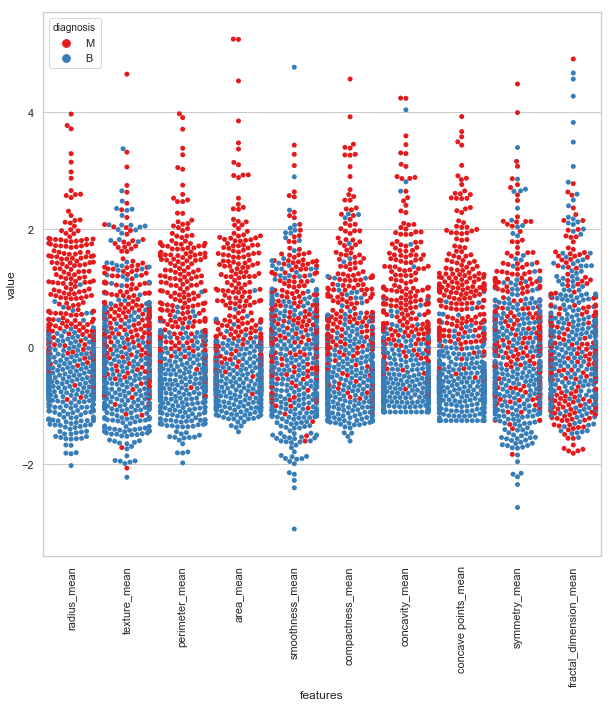

In [63]:
sns.set(style="whitegrid", palette="Set1")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

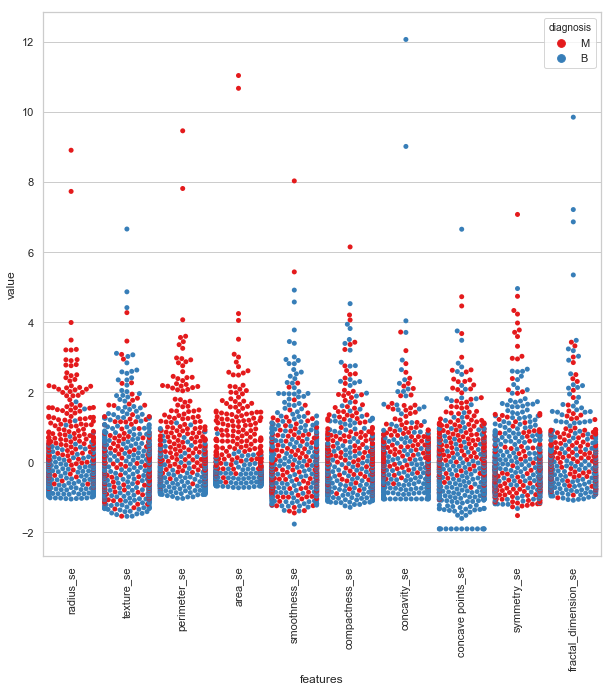

In [64]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

swarm plot time:  33.95940375328064  s


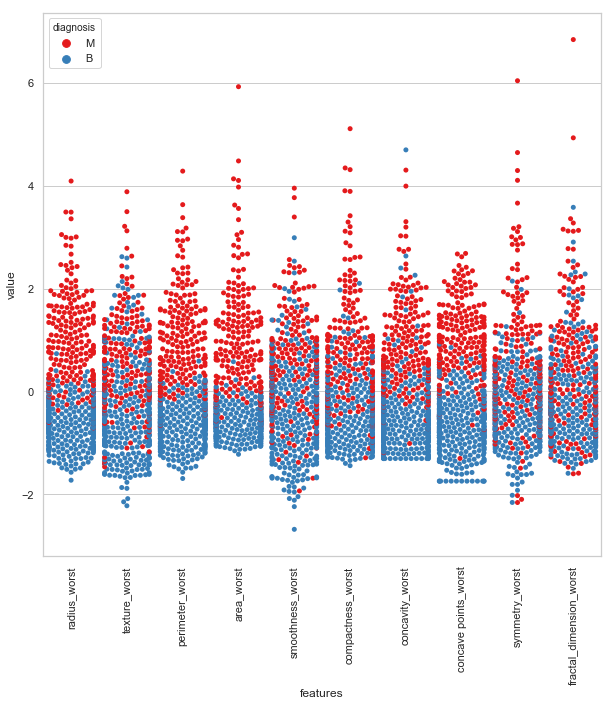

In [65]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

They looks cool right. And you can see variance more clear. Let me ask you a question, in these three plots which feature looks like more clear in terms of classification. In my opinion area_worst in last swarm plot looks like malignant and benign are seprated not totaly but mostly. Hovewer, smoothness_se in swarm plot 2 looks like malignant and benign are mixed so it is hard to classfy while using this feature.

What if we want to observe all correlation between features? Yes, you are right. The answer is heatmap that is old but powerful plot method.

#### Exploring data using heatmap

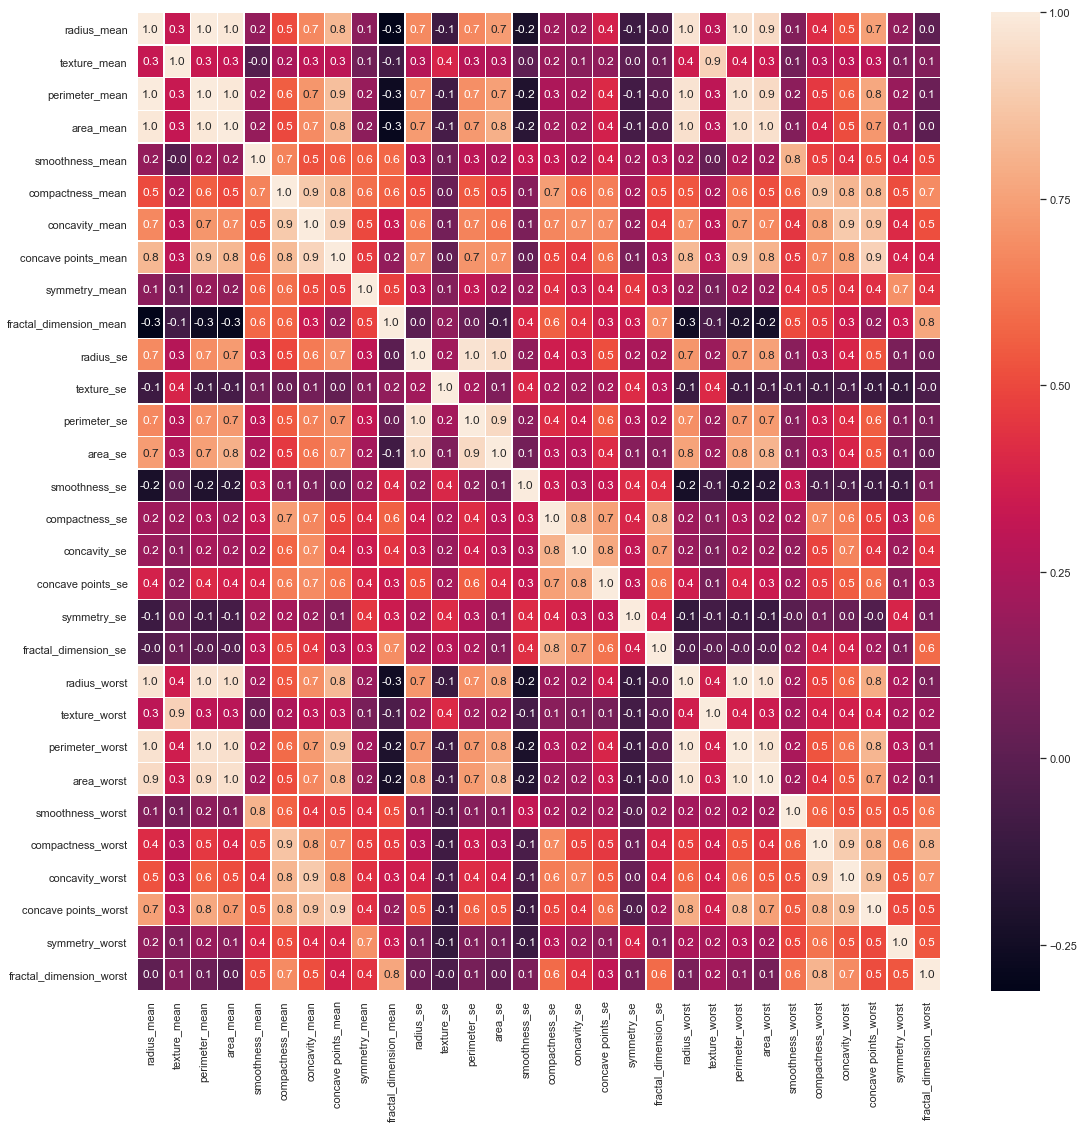

In [91]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

As it can be seen in map heat figure radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only area_mean. If you ask how i choose area_mean as a feature to use, well actually there is no correct answer, I just look at swarm plots and area_mean looks like clear for me but we cannot make exact separation among other correlated features without trying. So lets find other correlated features and look accuracy with random forest classifier.

Compactness_mean, concavity_mean and concave points_mean are correlated with each other.Therefore I only choose concavity_mean. Apart from these, radius_se, perimeter_se and area_se are correlated and I only use area_se. radius_worst, perimeter_worst and area_worst are correlated so I use area_worst. Compactness_worst, concavity_worst and concave points_worst so I use concavity_worst. Compactness_se, concavity_se and concave points_se so I use concavity_se. texture_mean and texture_worst are correlated and I use texture_mean. area_worst and area_mean are correlated, I use area_mean.

In [95]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


After drop correlated features, as it can be seen in below correlation matrix, there are no more correlated features. Actually, I know and you see there is correlation value 0.9 but lets see together what happen if we do not drop it.

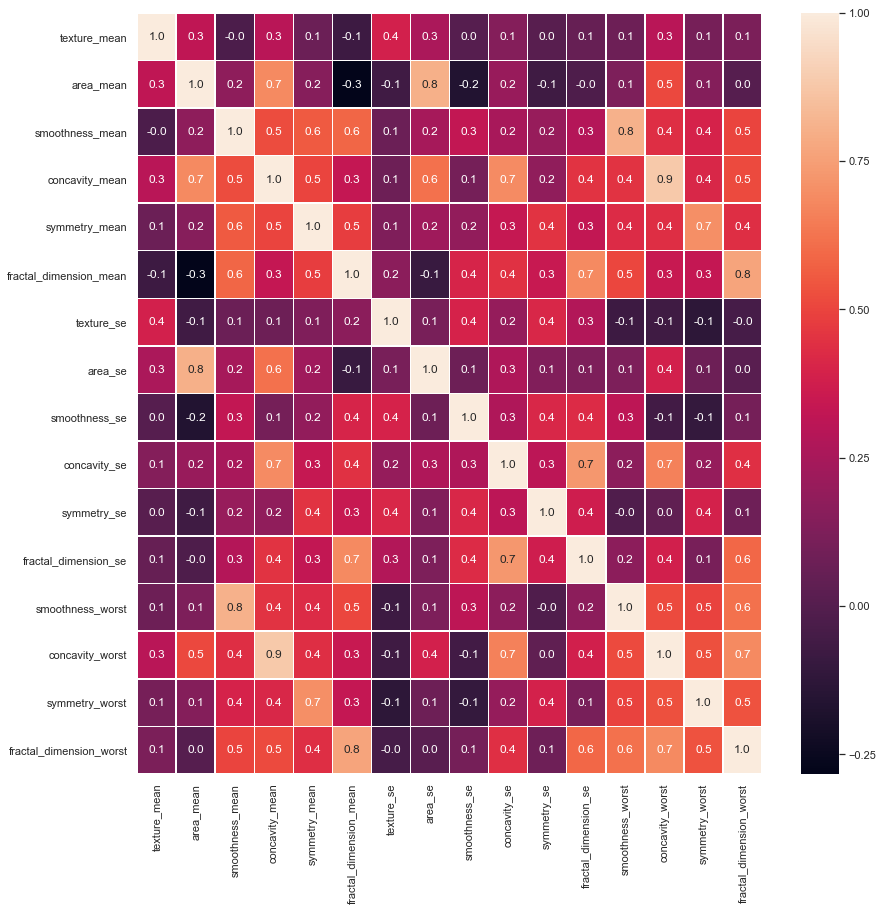

In [96]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

#### I will explore step 5 : Feature Selection in Part 2